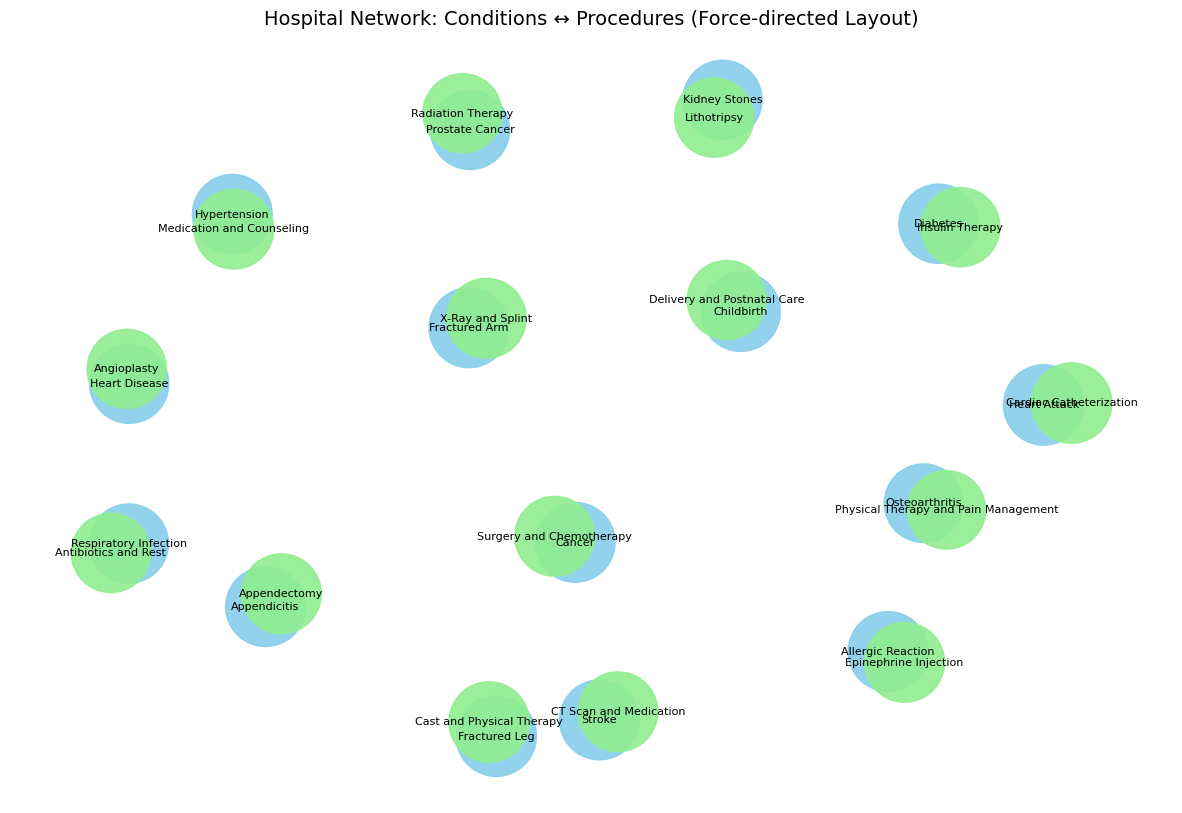

Number of Conditions: 15
Number of Procedures: 15
Top 5 Most Frequent Conditions:
               id  size      group
0  Fractured Leg    67  Condition
1   Heart Attack    67  Condition
2  Fractured Arm    66  Condition
3   Hypertension    66  Condition
4   Appendicitis    66  Condition
Top 5 Most Frequent Procedures:
                           id  size      group
0  Cast and Physical Therapy    67  Procedure
1    Cardiac Catheterization    67  Procedure
2           X-Ray and Splint    66  Procedure
3  Medication and Counseling    66  Procedure
4               Appendectomy    66  Procedure


In [3]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("/content/hospital data analysis (1).csv")

# Step 1: Build links (Condition-Procedure pairs with frequency)
links = df.groupby(["Condition", "Procedure"]).size().reset_index(name="value")

# Step 2: Build nodes
condition_counts = df["Condition"].value_counts().reset_index()
condition_counts.columns = ["id", "size"]
condition_counts["group"] = "Condition"

procedure_counts = df["Procedure"].value_counts().reset_index()
procedure_counts.columns = ["id", "size"]
procedure_counts["group"] = "Procedure"

nodes = pd.concat([condition_counts, procedure_counts], ignore_index=True)

# Step 3: Create Graph
G = nx.Graph()

# Add nodes
for _, row in nodes.iterrows():
    G.add_node(row["id"], group=row["group"], size=row["size"])

# Add edges
for _, row in links.iterrows():
    G.add_edge(row["Condition"], row["Procedure"], weight=row["value"])

# Step 4: Force-directed Layout
pos = nx.spring_layout(G, k=0.5, iterations=50)

# Step 5: Visualization
plt.figure(figsize=(15, 10))

# Node colors by group
colors = ["skyblue" if G.nodes[n]["group"] == "Condition" else "lightgreen" for n in G.nodes]
sizes = [G.nodes[n]["size"]*50 for n in G.nodes]  # scale size
edges = [G[u][v]["weight"] for u, v in G.edges]

nx.draw_networkx_nodes(G, pos, node_color=colors, node_size=sizes, alpha=0.9)
nx.draw_networkx_edges(G, pos, width=[w*0.3 for w in edges], alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=8)

plt.title("Hospital Network: Conditions ↔ Procedures (Force-directed Layout)", fontsize=14)
plt.axis("off")
plt.show()

# Step 6: Simple Analysis
print("Number of Conditions:", len(condition_counts))
print("Number of Procedures:", len(procedure_counts))
print("Top 5 Most Frequent Conditions:\n", condition_counts.head())
print("Top 5 Most Frequent Procedures:\n", procedure_counts.head())
